# 🚀 Guia de Análise de Dados com Python: Ensinando uma Máquina a Aprender

Olá, pessoal! Bem-vindos à nossa terceira aula do treinamento de dados.

Nas aulas passadas, seguimos os primeiros passos da metodologia CRISP-DM:
1. **Entendimento do Negócio e dos Dados**: Fizemos as perguntas certas e exploramos nosso dataset.  
2. **Preparação e Visualização**: Limpamos os dados, corrigimos problemas e criamos gráficos para encontrar os primeiros insights. Também demos uma olhada no Streamlit.
    

Hoje, vamos entrar nas fases de **Modelagem** e **Avaliação**. Vamos finalmente ensinar nosso computador a "aprender" dos dados e a fazer previsões. Esse é o mundo do **Aprendizado de Máquina** (ou _Machine Learning_).

O objetivo não é que vocês se tornem especialistas em 1 hora, mas sim que entendam os conceitos principais, conheçam algumas ferramentas poderosas e se sintam confiantes para aplicar isso no projeto de vocês.

## O que é Aprendizado de Máquina?

Imagine que eu peça para vocês criarem uma função em Python que me diz se um número é par ou ímpar. Fácil, certo?

O número 10 é Par
O número 7 é Ímpar


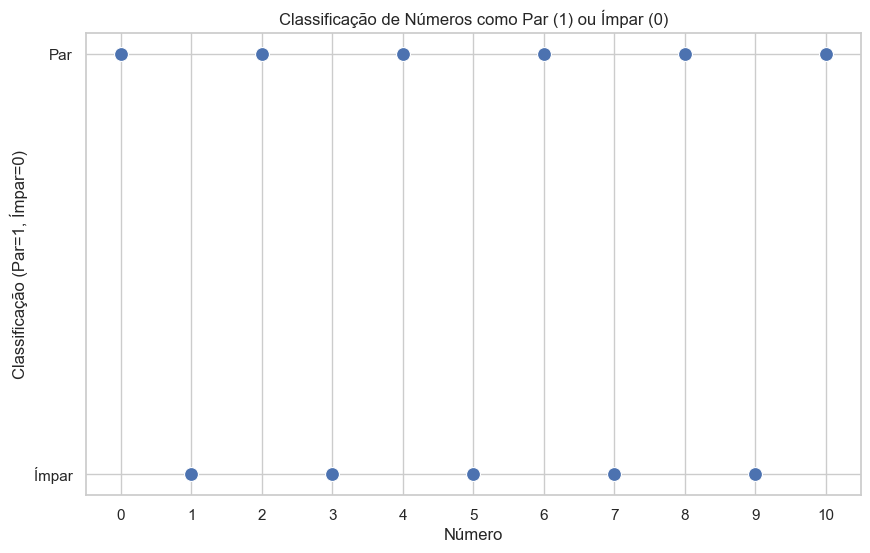

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Configurações de visualização
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def eh_par(numero):
    if numero % 2 == 0:
        return 1 # Par
    else:
        return 0 # Ímpar

print(f"O número 10 é {'Par' if eh_par(10) else 'Ímpar'}")
print(f"O número 7 é {'Par' if eh_par(7) else 'Ímpar'}")

# Gráfico com os números de 0 a 10 sendo classificados corretamente
numeros = np.arange(0, 11)
classificacao = [eh_par(n) for n in numeros]

plt.figure()
sns.scatterplot(x=numeros, y=classificacao, s=100)
plt.title("Classificação de Números como Par (1) ou Ímpar (0)")
plt.xlabel("Número")
plt.ylabel("Classificação (Par=1, Ímpar=0)")
plt.xticks(numeros)
plt.yticks([0, 1], ["Ímpar", "Par"])
plt.grid(True)
plt.show()

Nesse caso, nós ensinamos o computador **explicitamente** a regra (`numero % 2 == 0`).

No Aprendizado de Máquina, a abordagem é diferente. Nós não damos a regra, nós damos os **dados (exemplos)** e a **resposta esperada**, e o algoritmo descobre a regra sozinho.

Seria algo como:
- Input: 2, Output: "Par"
- Input: 3, Output: "Ímpar"
- Input: 8, Output: "Par"
- Input: 9, Output: "Ímpar"

O modelo de ML analisaria esses exemplos e "aprenderia" o padrão que gera essas respostas. Por exemplo, poderíamos representar essa classificação usando seno (onde 0 = Par, 1 = Ímpar):

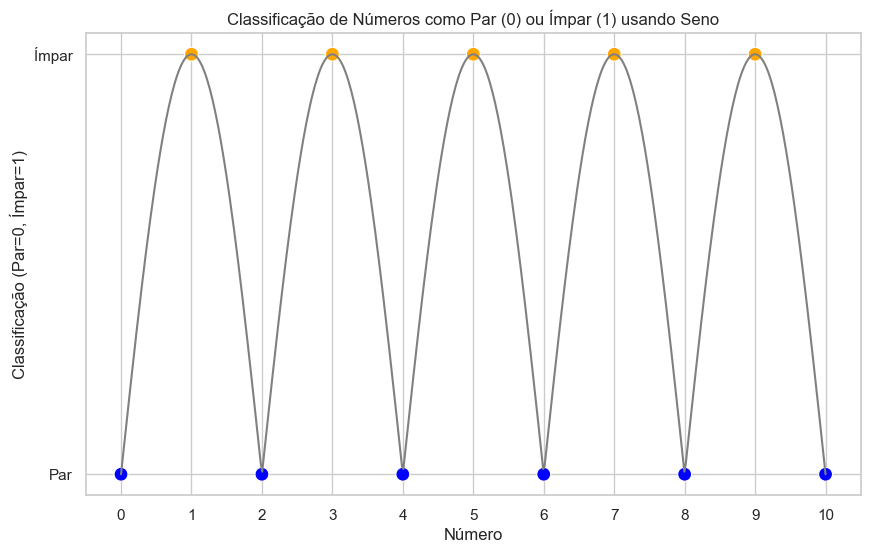

In [ ]:
def eh_impar_sen(n):
    # Esta função seno classifica 0 como Par, 1 como Ímpar, 2 como Par, etc.
    # O resultado de np.sin(n * np.pi / 2) é 0, 1, 0, -1, 0, 1, ...
    # O valor absoluto e a conversão para int mapeiam para 0, 1, 0, 1, ...
    return int(np.abs(1 * np.sin(n * np.pi / 2 + 0)))

# Gráfico mostrando a classificação correta de 0 a 10
numeros = np.arange(0, 11)
x_continuo = np.linspace(0, 10, 500)
y_continuo = np.abs(np.sin(x_continuo * np.pi / 2))
classificacao_numerica = [eh_impar_sen(n) for n in numeros]
classificacao_texto = ['Ímpar' if c == 1 else 'Par' for c in classificacao_numerica]
cores = ['orange' if c == 1 else 'blue' for c in classificacao_numerica]

plt.figure()
sns.lineplot(x=x_continuo, y=y_continuo, color='gray')#, label='Função Seno (Contínua)')
sns.scatterplot(x=numeros, y=classificacao_numerica, s=100, hue=classificacao_texto, palette=['blue', 'orange'], legend=False)
plt.title("Classificação de Números como Par (0) ou Ímpar (1) usando Seno")
plt.xlabel("Número")
plt.ylabel("Classificação (Par=0, Ímpar=1)")
plt.xticks(numeros)
plt.yticks([0, 1], ["Par", "Ímpar"])
plt.grid(True)
plt.show()

O objetivo do aprendizado de máquinas nesse caso seria encontrar os parâmetros dessa função seno.

Para problemas simples como este, parece exagero, mas e para prever o preço de uma casa? Ou para identificar se um e-mail é spam? As regras se tornam complexas demais para programarmos na mão. É aí que o Aprendizado de Máquina brilha!

> **Aprendizado de Máquina** é um campo da Inteligência Artificial que dá aos computadores a habilidade de aprender a partir de dados, sem serem explicitamente programados.

## Tipos de Aprendizado de Máquina


Existem várias "formas" de um modelo aprender. As três principais são:
1. **Aprendizado Supervisionado (O nosso foco hoje!)**:
    - **Como funciona?** Nós damos ao modelo dados **rotulados**, ou seja, dados de entrada junto com a resposta correta (o "gabarito").
    - **Exemplo**: Um conjunto de e-mails (entrada) já classificados como "Spam" ou "Não Spam" (rótulo/saída).
    - **Tipos**:
        - **Classificação**: Prever uma categoria (Ex: Spam/Não Spam, Doente/Saudável).
        - **Regressão**: Prever um valor numérico contínuo (Ex: Preço de uma casa, temperatura de amanhã).
            
2. **Aprendizado Não Supervisionado**:
    - **Como funciona?** Nós damos ao modelo dados **não rotulados** e pedimos para ele encontrar estruturas ou padrões por conta própria.
    - **Exemplo**: Um conjunto de dados de clientes e pedir ao modelo para criar grupos (clusters) de clientes com comportamentos de compra parecidos.
        
3. **Aprendizado por Reforço**:
	- **Como funciona?** O modelo (chamado de "agente") aprende tomando ações em um ambiente para maximizar uma recompensa. É baseado em tentativa e erro.    
    - **Exemplo**: Treinar uma IA para jogar xadrez. Ela joga milhares de vezes, sendo recompensada por jogadas boas e "punida" por jogadas ruins, até aprender a estratégia vencedora.

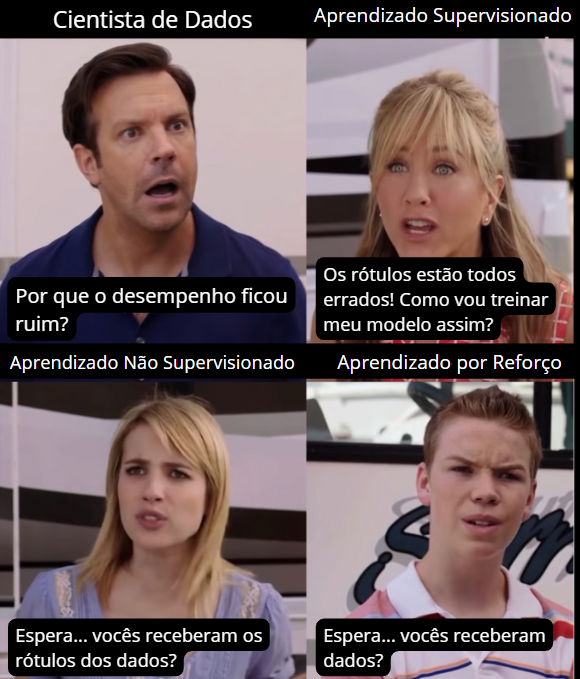

## O Fluxo de Trabalho de Modelagem

Antes de sair aplicando algoritmos, precisamos de um passo crucial: **dividir nossos dados**.

**Pense bem:** se você usa todos os seus dados para treinar o modelo, como você vai saber se ele realmente aprendeu ou se ele apenas **decorou** as respostas? É como estudar para uma prova lendo o gabarito. Você vai acertar todas as questões da lista, mas não vai conseguir resolver uma questão nova.

Para evitar isso, dividimos o dataset em conjuntos:
- **Conjunto de Desenvolvimento**: A maior parte dos dados (geralmente 70-80%). 
	- **Conjunto de Treino**: Usado para ajustar o modelo.
	- **Conjunto de Validação**: Usado para comparar modelos ou hiperparâmetros
- **Conjunto de Teste**: O restante dos dados (20-30%). Esses dados ficam "guardados" e o modelo **nunca** os vê durante o treino. Usamos no final para simular como o modelo se sairia com dados novos e ter uma avaliação honesta de sua performance.

In [6]:
from sklearn.model_selection import train_test_split

# Gerar um conjunto de dados aleatório de exemplo
np.random.seed(42)
data = pd.DataFrame({
    'feature1': np.random.rand(100) * 10,
    'feature2': np.random.rand(100) * 50,
    'target': np.random.randint(0, 2, 100)
})

# Separar features (X) do alvo (y)
X = data[['feature1', 'feature2']]
y = data['target']

# 1. Primeira divisão: separar o conjunto de Teste (20%)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Segunda divisão: repartir o conjunto de Desenvolvimento em Treino e Validação
# Vamos usar 25% do conjunto de dev para validação, o que corresponde a 20% do total original (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=42, stratify=y_dev)

print(f"Tamanho total do dataset: {len(data)} amostras")
print(f"Tamanho do conjunto de Treino: {len(X_train)} amostras ({len(X_train)/len(data):.0%})")
print(f"Tamanho do conjunto de Validação: {len(X_val)} amostras ({len(X_val)/len(data):.0%})")
print(f"Tamanho do conjunto de Teste: {len(X_test)} amostras ({len(X_test)/len(data):.0%})")


Tamanho total do dataset: 100 amostras
Tamanho do conjunto de Treino: 60 amostras (60%)
Tamanho do conjunto de Validação: 20 amostras (20%)
Tamanho do conjunto de Teste: 20 amostras (20%)


Uma coisa importante de citar é que o processo de "treinamento" de alguns códigos do pré-processamento (como PCA ou ajuste de escala) são feitos no conjunto de treino e apenas aplicados nos demais. Caso contrário, haveria vazamento de dados (data leakage).

## Underfitting vs. Overfitting

Esses são dois problemas clássicos em modelagem:
- **Underfitting (Subajuste)**: O modelo é simples demais e não consegue capturar nem o padrão dos dados de treino. Ele erra muito no treino e, consequentemente, no teste. É como tentar usar uma régua para desenhar um círculo. 
- **Overfitting (Sobreajuste)**: O modelo é complexo demais e "decora" os dados de treino, incluindo os ruídos e as particularidades. Ele vai muito bem no treino, mas muito mal no teste.

Nosso objetivo é encontrar o "Bom Ajuste" (Good Fit), um modelo que **generaliza** bem, ou seja, aprende o padrão principal dos dados e consegue aplicá-lo a novos dados que nunca viu.

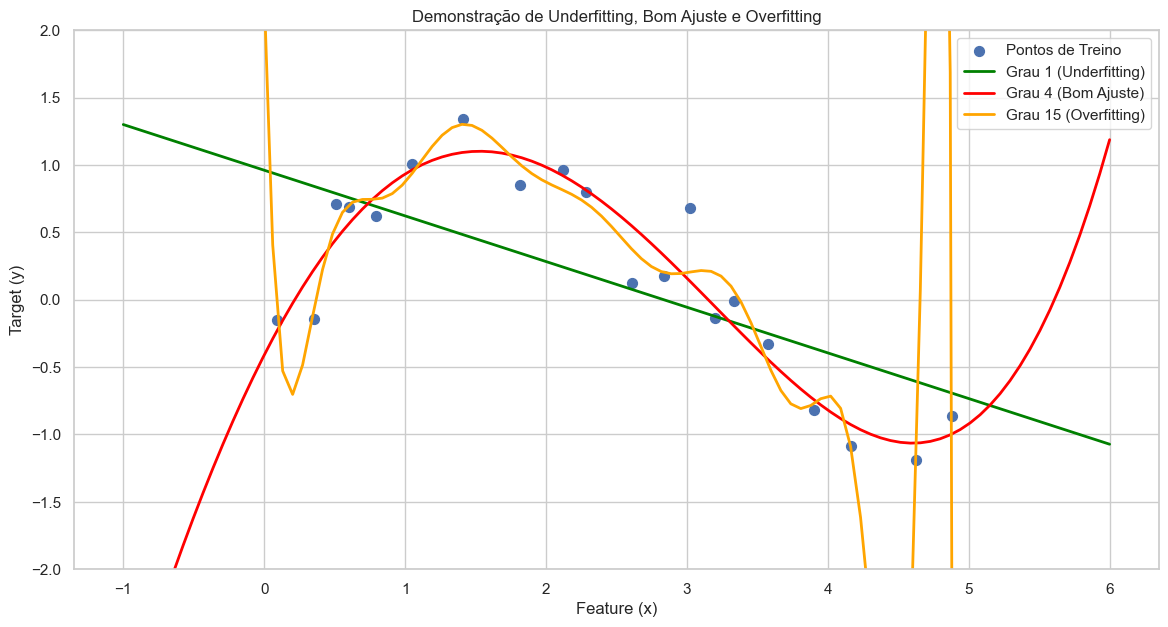

In [7]:
# Gerar dados baseados em uma função quadrática com ruído
np.random.seed(0)
X_poly = np.sort(5 * np.random.rand(80, 1), axis=0)
y_poly = np.sin(X_poly).ravel() + np.random.randn(80) * 0.3

# Amostrar apenas alguns pontos para o treinamento
X_train_poly = X_poly[::4]
y_train_poly = y_poly[::4]

# Importar ferramentas para criar modelos polinomiais
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Criar e treinar os modelos
# Grau 1 - Underfitting
underfit_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
underfit_model.fit(X_train_poly, y_train_poly)

# Grau 4 - Good Fit
goodfit_model = make_pipeline(PolynomialFeatures(4), LinearRegression())
goodfit_model.fit(X_train_poly, y_train_poly)

# Grau 15 - Overfitting
overfit_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
overfit_model.fit(X_train_poly, y_train_poly)

# Gerar pontos para o plot das curvas
X_plot = np.linspace(-1, 6, 100)[:, np.newaxis]

# Fazer predições
y_underfit_plot = underfit_model.predict(X_plot)
y_goodfit_plot = goodfit_model.predict(X_plot)
y_overfit_plot = overfit_model.predict(X_plot)

# Plotar os resultados
plt.figure(figsize=(14, 7))
plt.scatter(X_train_poly, y_train_poly, edgecolor='b', s=50, label="Pontos de Treino")
plt.plot(X_plot, y_underfit_plot, color='green', linewidth=2, label="Grau 1 (Underfitting)")
plt.plot(X_plot, y_goodfit_plot, color='red', linewidth=2, label="Grau 4 (Bom Ajuste)")
plt.plot(X_plot, y_overfit_plot, color='orange', linewidth=2, label="Grau 15 (Overfitting)")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.title("Demonstração de Underfitting, Bom Ajuste e Overfitting")
plt.legend(loc="upper right")
plt.ylim(-2, 2)
plt.show()

## Nossos Primeiros Algoritmos!

### 1. Regressão Linear (Supervisionado)

- **Ideia Principal**: Encontrar a melhor reta que descreve a relação entre a variável de entrada (X) e a de saída (y).    
- **Um Pouco de Matemática**: O modelo tenta encontrar os melhores valores para os coeficientes `a` (inclinação) e `b` (intercepto) na equação da reta `y = a*x + b`. "Melhor" aqui significa a reta que minimiza a soma dos quadrados das distâncias (erros) entre os pontos reais e a própria reta. É o famoso **Método dos Mínimos Quadrados**.

O Erro Quadrático Médio do modelo foi: 77965140.40
Raiz do Erro Quadrático Médio (RMSE): 8829.79


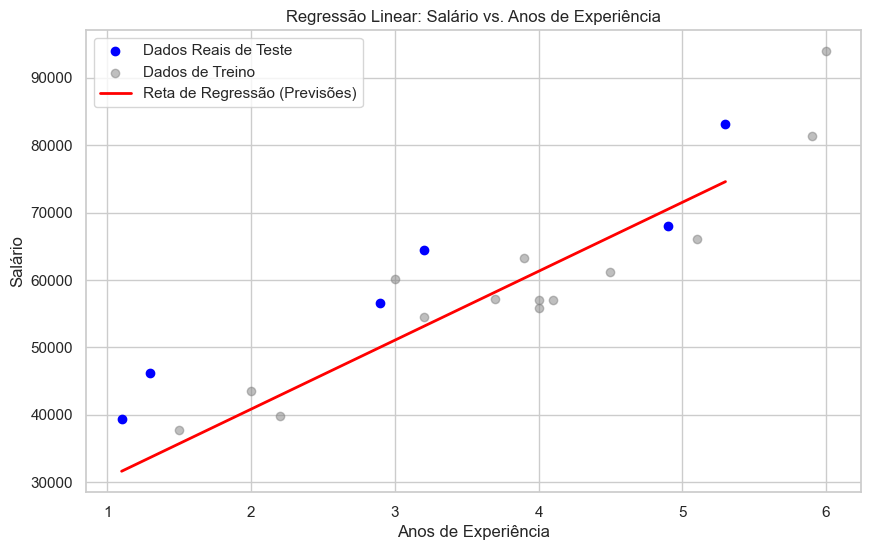

In [11]:
# Usaremos o dataset de Salário vs. Experiência
data_reg = {
    'AnosExperiencia': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0],
    'Salario': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940]
}
df_reg = pd.DataFrame(data_reg)

X_reg = df_reg[['AnosExperiencia']]
y_reg = df_reg['Salario']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


# 1. Criar o modelo
modelo_reg_linear = LinearRegression()

# 2. Treinar o modelo com os dados de TREINO
modelo_reg_linear.fit(X_reg_train, y_reg_train)

# 3. Fazer previsões com os dados de TESTE
previsoes_salario = modelo_reg_linear.predict(X_reg_test)

# 4. Avaliar o modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_reg_test, previsoes_salario)
print(f"O Erro Quadrático Médio do modelo foi: {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {np.sqrt(mse):.2f}")

# Visualizando o resultado
plt.scatter(X_reg_test, y_reg_test, color='blue', label='Dados Reais de Teste')
plt.scatter(X_reg_train, y_reg_train, color='gray', label='Dados de Treino', alpha=0.5)
plt.plot(X_reg_test.sort_values(by='AnosExperiencia'), modelo_reg_linear.predict(X_reg_test.sort_values(by='AnosExperiencia')), color='red', linewidth=2, label='Reta de Regressão (Previsões)')
plt.title('Regressão Linear: Salário vs. Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()

### 2. Árvores de Decisão (Supervisionado)

- **Ideia Principal**: Criar uma estrutura de fluxo, como um fluxograma, com perguntas de "sim" ou "não" para chegar a uma decisão. É um dos modelos mais intuitivos que existem.
- **Um Pouco de Matemática**: Como a árvore sabe qual a melhor pergunta a se fazer em cada etapa? Ela calcula a "pureza" dos dados. Ela escolhe a pergunta que melhor divide os dados em grupos mais "puros" (homogêneos). Medidas como o **Índice de Gini** ou a **Entropia** são usadas para calcular essa pureza.

A Acurácia do modelo foi: 100.00%


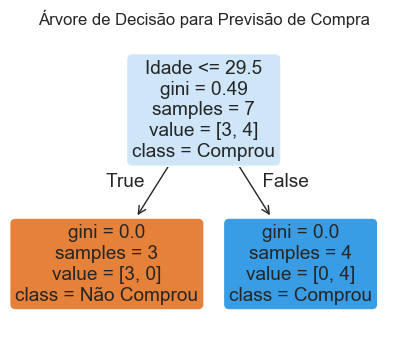

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Usaremos o dataset de Compra vs. Idade
data_class = {
    'Idade': [19, 35, 26, 27, 32, 25, 40, 42, 23, 37],
    'Comprou': [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # 0 = Não, 1 = Sim
}
df_class = pd.DataFrame(data_class)

X_class = df_class[['Idade']]
y_class = df_class['Comprou']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# 1. Criar o modelo
modelo_arvore = DecisionTreeClassifier(max_depth=3, random_state=42)

# 2. Treinar o modelo
modelo_arvore.fit(X_class_train, y_class_train)

# 3. Fazer previsões
previsoes_compra = modelo_arvore.predict(X_class_test)

# 4. Avaliar o modelo
acuracia = accuracy_score(y_class_test, previsoes_compra)
print(f"A Acurácia do modelo foi: {acuracia*100:.2f}%")

# Visualizando a árvore
plt.figure(figsize=(5, 4))
plot_tree(modelo_arvore, filled=True, feature_names=['Idade'], class_names=['Não Comprou', 'Comprou'], rounded=True)
plt.title("Árvore de Decisão para Previsão de Compra")
plt.show()



Pode parecer que esses modelos que vamos apresentar são simples, mas muitas vezes eles conseguem se sair muito bem. Isso depende, por exemplo, da qualidade e quantidade do dataset.

![Pasted image 20250830075707.png](<attachment:Pasted image 20250830075707.png>)
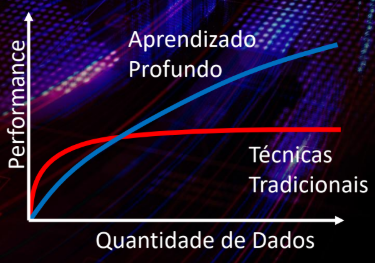

Uma alternativa é utilizar a combinação de vários modelos. Isso é chamado de **Ensemble**. Podemos citar por exemplo:
- **Random Forest (Floresta Aleatória)**: Treina várias árvores de decisão em partes aleatórias dos dados e tira a "média" das previsões (ou o voto da maioria).
- **XGBoost**: Treina árvores em sequência, onde cada nova árvore tenta corrigir os erros da anterior. É extremamente poderoso e muito usado em competições.

### 3. K-Means (Não Supervisionado)
- **Ideia Principal**: Encontrar `K` grupos (clusters) nos dados. Ele não prevê nada, apenas agrupa o que é parecido.
- **Como funciona?**
    1. Escolhe `K` pontos aleatórios como centros dos clusters (centroides).
    2. Associa cada ponto do dataset ao centroide mais próximo.
    3. Recalcula a posição dos centroides para ser a média de todos os pontos associados a ele.
    4. Repete os passos 2 e 3 até que os centroides não mudem mais de posição.

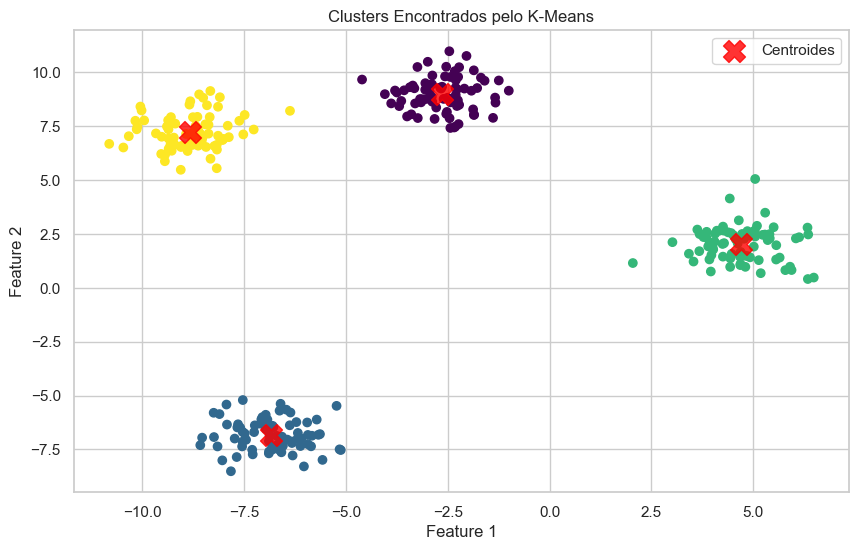

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Criando um dataset de exemplo para Clusterização
X_cluster, y_true_clusters = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 1. Criar o modelo
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# 2. Treinar e atribuir os clusters
clusters_encontrados = kmeans.fit_predict(X_cluster)

# Visualizando os clusters encontrados
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=clusters_encontrados, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.8, marker='X', label='Centroides')
plt.title('Clusters Encontrados pelo K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

#### Como definir o K? Método do Cotovelo (Elbow Method):

Calculamos o erro do K-Means para vários valores de `K`. O erro (chamado de inércia ou WCSS) é a soma das distâncias quadradas de cada ponto ao seu centroide. Plotamos o erro vs. `K` e procuramos por um "cotovelo" na curva, que indica o ponto onde adicionar mais clusters não melhora significativamente o resultado.


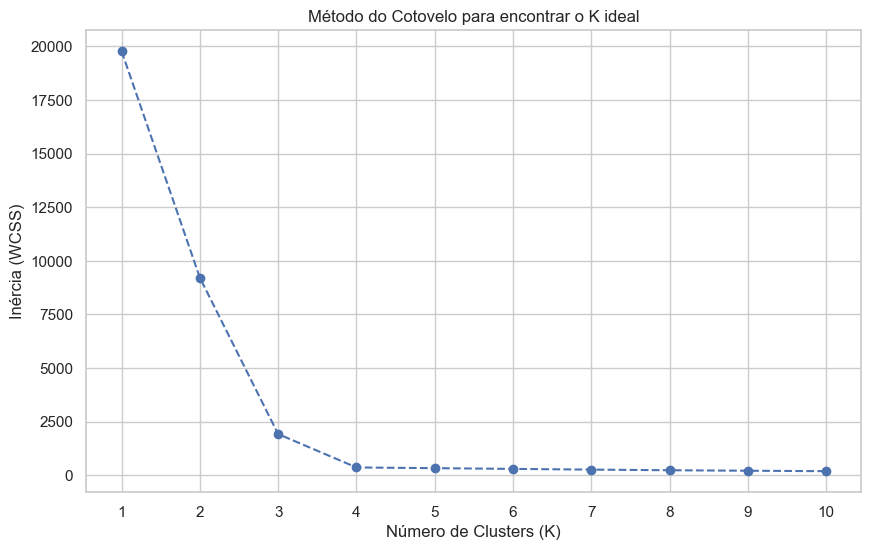

In [17]:
# Lista para armazenar a inércia (erro) para cada valor de K
inercia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inercia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (WCSS)')
plt.title('Método do Cotovelo para encontrar o K ideal')
plt.xticks(k_range)
plt.grid(True)
plt.show()



No gráfico acima, o "cotovelo" é claramente em K=4, confirmando que encontramos o número correto de grupos.

## Dever de Casa e Próximos Passos

Agora é a vez de vocês! A teoria é importante, mas a mágica acontece na prática.
1. **Modelagem**: Peguem o dataset do projeto de vocês. Apliquem pelo menos 2 algoritmos que vimos hoje (ou pesquisem outros, como Random Forest, KNN, etc.).
2. **Avaliação**: Usem as métricas de avaliação (`accuracy_score`, `mean_squared_error`, etc.) para ver qual modelo se saiu melhor. Qual foi o desempenho do modelo final no conjunto de teste?
3. **Implementação**: Adicionem o **melhor modelo** ao aplicativo Streamlit de vocês. O app deve permitir que um usuário insira novos dados e receba a previsão do modelo.
4. **Deploy**: Como desafio final, pesquisem como fazer o _deploy_ da aplicação de vocês usando o "Streamlit Community Cloud" (é gratuito e bem simples!). Assim, qualquer pessoa com o link poderá usar o app de vocês.

# Dúvidas Comuns e Dicas Finais

> **"Como você decorou todos esses comandos?"**

**Resposta: Eu não decorei.** Ninguém decora. O segredo é:
1. **Entender os conceitos**: Se eu sei o que é uma Regressão Linear, eu sei o que procurar.
2. **Prática**: Quanto mais você faz, mais natural se torna. Você vai começar a lembrar dos comandos mais comuns, como `.fit()`, `.predict()`, `train_test_split`.

O trabalho de um cientista de dados não é ser uma enciclopédia de comandos, mas sim **saber como resolver problemas usando as ferramentas disponíveis**.

> **"E o GitHub?"**

Para quem estava com dúvida sobre Git/GitHub, uma dica: comecem com o **GitHub Desktop**. É um programa com interface visual que simplifica tudo. Depois de instalar e conectar sua conta, o processo é basicamente:
1. Faça suas alterações no código (no VSCode, Colab, etc.).
2. Abra o GitHub Desktop, ele vai mostrar os arquivos alterados.
3. Escreva uma mensagem de commit (ex: "Adiciona modelo de regressão linear").
4. Clique em "Commit" e depois em "Push".

Pronto! Seu código está salvo e versionado. É uma ferramenta essencial para trabalhar em equipe e construir um portfólio.